This project is an introduction to artificial neural nets: fully-connected
neural nets, hidden layers, activation functions, back-propagation, dropout.

### Implementation Steps:
1. **Setup:** Create a Jupyter notebook environment and import necessary libraries.
2. **Data Exploration and Preprocessing:** Load the dataset, perform exploratory data analysis, handle missing values, and perform feature engineering.
3. **Model Development:** Implement various models as specified in the mandatory part.
4. **Evaluation:** Compare models based on accuracy and AUC, and create a summary table.
5. **Optimization:** Work on the bonus part to enhance model performance.
6. **Finalization:** Prepare the submission file and documentation for peer review.

Tabular modeling takes data in the form of a table (like a spreadsheet or CSV). The objective is to predict the value in one column based on the values in the other columns.

## 1. Setup

In [71]:
%%capture
! pip install -Uqq fastbook dtreeviz

import fastbook
fastbook.setup_book()

import numpy as np
import pandas as pd

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import dtreeviz
import pickle

from fastbook import *
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG
random_state = 123
import warnings
warnings.filterwarnings('ignore')

In [72]:
def update_summary_table(approach, lib, accuracy, auc):

    baseline_index = summary_table[summary_table['Approach'] == approach].index

    summary_table.loc[baseline_index, 'Library Used'] = lib
    summary_table.loc[baseline_index, 'Accuracy'] = accuracy
    summary_table.loc[baseline_index, 'AUC Score'] = auc
    return summary_table

summary_table = pd.DataFrame({
    "Approach": ["Baseline (Naive Classifier)", "Random Forest", "Scikit-learn (MLPClassifier)", 
                 "Keras (TensorFlow)", "TensorFlow", "NumPy"],
    "Library Used": ["None", "Scikit-learn", "Scikit-learn", "TensorFlow", "TensorFlow", "NumPy"],
    "Algorithm": ["Naive Classifier", "Random Forest", "MLPClassifier", "Keras Neural Network", 
                  "TensorFlow Neural Network", "Custom Neural Network"],
    "Hyperparameters": ["N/A", "Optimized via Grid Search", "Default / Custom Settings", 
                        "Custom Settings", "Custom Settings", "Custom Implementation"],
    "Accuracy": ["To be filled", "To be filled", "To be filled", "To be filled", "To be filled", "To be filled"],
    "AUC Score": ["To be filled", "To be filled", "To be filled", "To be filled", "To be filled", "To be filled"]
})



summary_table

,Approach,Library Used,Algorithm,Hyperparameters,Accuracy,AUC Score
0,Baseline (Naive Classifier),None,Naive Classifier,N/A,To be filled,To be filled
1,Random Forest,Scikit-learn,Random Forest,Optimized via Grid Search,To be filled,To be filled
2,Scikit-learn (MLPClassifier),Scikit-learn,MLPClassifier,Default / Custom Settings,To be filled,To be filled
3,Keras (TensorFlow),TensorFlow,Keras Neural Network,Custom Settings,To be filled,To be filled
4,TensorFlow,TensorFlow,TensorFlow Neural Network,Custom Settings,To be filled,To be filled
5,NumPy,NumPy,Custom Neural Network,Custom Implementation,To be filled,To be filled


## 2. Data Exploration and Preprocessing

- Download and prepare the dataset.
- Perform data preprocessing, such as handling missing values and feature selection.
- Split the dataset into training and testing sets with stratification.

In tabular data some columns may contain numerical data, like "age," while others contain string values, like "sex." The numerical data can be directly fed to the model (with some optional preprocessing), but the other columns need to be converted to numbers. Since the values in those correspond to different categories, we often call this type of variables categorical variables. The first type are called continuous variables.

In [73]:
file_path =  '/kaggle/input/bank-data-train-csv'
df = pd.read_csv(f'{file_path}/bank_data_train.csv', low_memory=False)
# file_path = 'data/bank_data_train.csv'
# df = pd.read_csv(file_path, low_memory=False)

df.head()

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,AMOUNT_RUB_SUP_PRC,PRC_ACCEPTS_A_AMOBILE,SUM_TRAN_AUT_TENDENCY3M,CLNT_TRUST_RELATION,PRC_ACCEPTS_TK,PRC_ACCEPTS_A_MTP,REST_DYNAMIC_FDEP_1M,CNT_TRAN_AUT_TENDENCY3M,CNT_ACCEPTS_TK,APP_MARITAL_STATUS,REST_DYNAMIC_SAVE_3M,CR_PROD_CNT_VCU,REST_AVG_CUR,CNT_TRAN_MED_TENDENCY1M,APP_KIND_OF_PROP_HABITATION,CLNT_JOB_POSITION_TYPE,AMOUNT_RUB_NAS_PRC,CLNT_JOB_POSITION,APP_DRIVING_LICENSE,TRANS_COUNT_SUP_PRC,APP_EDUCATION,CNT_TRAN_CLO_TENDENCY1M,SUM_TRAN_MED_TENDENCY1M,PRC_ACCEPTS_A_ATM,PRC_ACCEPTS_MTP,TRANS_COUNT_NAS_PRC,APP_TRAVEL_PASS,CNT_ACCEPTS_MTP,CR_PROD_CNT_TOVR,APP_CAR,CR_PROD_CNT_PIL,SUM_TRAN_CLO_TENDENCY1M,APP_POSITION_TYPE,TURNOVER_CC,TRANS_COUNT_ATM_PRC,AMOUNT_RUB_ATM_PRC,TURNOVER_PAYM,AGE,CNT_TRAN_MED_TENDENCY3M,CR_PROD_CNT_CC,SUM_TRAN_MED_TENDENCY3M,REST_DYNAMIC_FDEP_3M,REST_DYNAMIC_IL_1M,APP_EMP_TYPE,SUM_TRAN_CLO_TENDENCY3M,LDEAL_TENOR_MAX,LDEAL_YQZ_CHRG,CR_PROD_CNT_CCFP,DEAL_YQZ_IR_MAX,LDEAL_YQZ_COM,DEAL_YQZ_IR_MIN,CNT_TRAN_CLO_TENDENCY3M,REST_DYNAMIC_CUR_1M,REST_AVG_PAYM,LDEAL_TENOR_MIN,LDEAL_AMT_MONTH,APP_COMP_TYPE,LDEAL_GRACE_DAYS_PCT_MED,REST_DYNAMIC_CUR_3M,CNT_TRAN_SUP_TENDENCY3M,TURNOVER_DYNAMIC_CUR_1M,REST_DYNAMIC_PAYM_3M,SUM_TRAN_SUP_TENDENCY3M,REST_DYNAMIC_IL_3M,CNT_TRAN_ATM_TENDENCY3M,CNT_TRAN_ATM_TENDENCY1M,TURNOVER_DYNAMIC_IL_3M,SUM_TRAN_ATM_TENDENCY3M,DEAL_GRACE_DAYS_ACC_S1X1,AVG_PCT_MONTH_TO_PCLOSE,DEAL_YWZ_IR_MIN,SUM_TRAN_SUP_TENDENCY1M,DEAL_YWZ_IR_MAX,SUM_TRAN_ATM_TENDENCY1M,REST_DYNAMIC_PAYM_1M,CNT_TRAN_SUP_TENDENCY1M,DEAL_GRACE_DAYS_ACC_AVG,TURNOVER_DYNAMIC_CUR_3M,PACK,MAX_PCLOSE_DATE,LDEAL_YQZ_PC,CLNT_SETUP_TENOR,DEAL_GRACE_DAYS_ACC_MAX,TURNOVER_DYNAMIC_PAYM_3M,LDEAL_DELINQ_PER_MAXYQZ,TURNOVER_DYNAMIC_PAYM_1M,CLNT_SALARY_VALUE,TRANS_AMOUNT_TENDENCY3M,MED_DEBT_PRC_YQZ,TRANS_CNT_TENDENCY3M,LDEAL_USED_AMT_AVG_YQZ,REST_DYNAMIC_CC_1M,LDEAL_USED_AMT_AVG_YWZ,TURNOVER_DYNAMIC_CC_1M,AVG_PCT_DEBT_TO_DEAL_AMT,LDEAL_ACT_DAYS_ACC_PCT_AVG,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
0,146841,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.541683,0,156067.339767,NaN,NaN,NaN,0.0,начальник отдела,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,0,NaN,NaN,0.0,1.000000,1.000000,0.0,660,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0.134651,0.0,NaN,NaN,NaN,0.0,0.474134,NaN,0.131910,0.0,NaN,0.0,0.406780,0.101695,0.0,0.483032,NaN,NaN,NaN,NaN,NaN,0.134634,0.0,NaN,NaN,0.442285,K01,NaN,NaN,1.593023,NaN,0.0,NaN,0.0,NaN,0.483032,NaN,0.406780,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
1,146842,0,0.041033,NaN,NaN,NaN,NaN,0.0,0.166667,0.186107,0.244678,NaN,0.670968,NaN,NaN,NaN,0.0,0.666667,NaN,NaN,0.000000,0,4278.845817,NaN,NaN,NaN,0.0,NaN,NaN,0.454545,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,0,NaN,NaN,0.0,0.109091,0.410691,0.0,552,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0.239365,0.0,NaN,NaN,NaN,0.0,0.384264,0.6,0.101934,0.0,0.510712,0.0,0.333333,0.166667,0.0,0.200000,NaN,NaN,NaN,0.309799,NaN,0.133333,0.0,0.24,NaN,0.515876,102,NaN,NaN,1.587647,NaN,0.0,NaN,0.0,NaN,0.394340,NaN,0.545455,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
2,146843,0,0.006915,0.0,NaN,0.0,0.0,0.0,NaN,NaN,0.000000,0.0,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,0.000000,0,112837.062817,NaN,NaN,NaN,0.0,ГЕНЕРАЛЬНЫЙ ДИРЕКТОР,NaN,0.000000,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0,NaN,0,NaN,NaN,0.0,0.810811,0.925140,0.0,420,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0.084341,0.0,NaN,NaN,NaN,0.0,0.336136,NaN,0.121041,0.0,NaN,0.0,0.366667,0.133333,0.0,0.431656,NaN,NaN,NaN,NaN,NaN,0.063129,0.0,NaN,NaN,0.522833,102,NaN,NaN,1.587647,NaN,0.0,NaN,0.0,NaN,0.399342,NaN,0.297297,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
3,146844,0,0.00

In [74]:
len(df.columns)

116

In [75]:
constant_or_nan_cols = [col for col in df.columns if df[col].nunique(dropna=True) <= 1]
df.drop(columns=constant_or_nan_cols, inplace=True)
constant_or_nan_cols

['PRC_ACCEPTS_A_EMAIL_LINK',
 'PRC_ACCEPTS_A_POS',
 'PRC_ACCEPTS_A_TK',
 'PRC_ACCEPTS_A_AMOBILE',
 'PRC_ACCEPTS_TK',
 'PRC_ACCEPTS_A_MTP',
 'CNT_ACCEPTS_TK',
 'PRC_ACCEPTS_A_ATM',
 'PRC_ACCEPTS_MTP',
 'CNT_ACCEPTS_MTP']

In [76]:
len(df.columns)

106

In [77]:
df[df.select_dtypes(include=["object"]).columns] = df.select_dtypes(include=["object"]).apply(lambda c: c.str.lower())

In [78]:
df

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,APP_REGISTR_RGN_CODE,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,AMOUNT_RUB_SUP_PRC,SUM_TRAN_AUT_TENDENCY3M,CLNT_TRUST_RELATION,REST_DYNAMIC_FDEP_1M,CNT_TRAN_AUT_TENDENCY3M,APP_MARITAL_STATUS,REST_DYNAMIC_SAVE_3M,CR_PROD_CNT_VCU,REST_AVG_CUR,CNT_TRAN_MED_TENDENCY1M,APP_KIND_OF_PROP_HABITATION,CLNT_JOB_POSITION_TYPE,AMOUNT_RUB_NAS_PRC,CLNT_JOB_POSITION,APP_DRIVING_LICENSE,TRANS_COUNT_SUP_PRC,APP_EDUCATION,CNT_TRAN_CLO_TENDENCY1M,SUM_TRAN_MED_TENDENCY1M,TRANS_COUNT_NAS_PRC,APP_TRAVEL_PASS,CR_PROD_CNT_TOVR,APP_CAR,CR_PROD_CNT_PIL,SUM_TRAN_CLO_TENDENCY1M,APP_POSITION_TYPE,TURNOVER_CC,TRANS_COUNT_ATM_PRC,AMOUNT_RUB_ATM_PRC,TURNOVER_PAYM,AGE,CNT_TRAN_MED_TENDENCY3M,CR_PROD_CNT_CC,SUM_TRAN_MED_TENDENCY3M,REST_DYNAMIC_FDEP_3M,REST_DYNAMIC_IL_1M,APP_EMP_TYPE,SUM_TRAN_CLO_TENDENCY3M,LDEAL_TENOR_MAX,LDEAL_YQZ_CHRG,CR_PROD_CNT_CCFP,DEAL_YQZ_IR_MAX,LDEAL_YQZ_COM,DEAL_YQZ_IR_MIN,CNT_TRAN_CLO_TENDENCY3M,REST_DYNAMIC_CUR_1M,REST_AVG_PAYM,LDEAL_TENOR_MIN,LDEAL_AMT_MONTH,APP_COMP_TYPE,LDEAL_GRACE_DAYS_PCT_MED,REST_DYNAMIC_CUR_3M,CNT_TRAN_SUP_TENDENCY3M,TURNOVER_DYNAMIC_CUR_1M,REST_DYNAMIC_PAYM_3M,SUM_TRAN_SUP_TENDENCY3M,REST_DYNAMIC_IL_3M,CNT_TRAN_ATM_TENDENCY3M,CNT_TRAN_ATM_TENDENCY1M,TURNOVER_DYNAMIC_IL_3M,SUM_TRAN_ATM_TENDENCY3M,DEAL_GRACE_DAYS_ACC_S1X1,AVG_PCT_MONTH_TO_PCLOSE,DEAL_YWZ_IR_MIN,SUM_TRAN_SUP_TENDENCY1M,DEAL_YWZ_IR_MAX,SUM_TRAN_ATM_TENDENCY1M,REST_DYNAMIC_PAYM_1M,CNT_TRAN_SUP_TENDENCY1M,DEAL_GRACE_DAYS_ACC_AVG,TURNOVER_DYNAMIC_CUR_3M,PACK,MAX_PCLOSE_DATE,LDEAL_YQZ_PC,CLNT_SETUP_TENOR,DEAL_GRACE_DAYS_ACC_MAX,TURNOVER_DYNAMIC_PAYM_3M,LDEAL_DELINQ_PER_MAXYQZ,TURNOVER_DYNAMIC_PAYM_1M,CLNT_SALARY_VALUE,TRANS_AMOUNT_TENDENCY3M,MED_DEBT_PRC_YQZ,TRANS_CNT_TENDENCY3M,LDEAL_USED_AMT_AVG_YQZ,REST_DYNAMIC_CC_1M,LDEAL_USED_AMT_AVG_YWZ,TURNOVER_DYNAMIC_CC_1M,AVG_PCT_DEBT_TO_DEAL_AMT,LDEAL_ACT_DAYS_ACC_PCT_AVG,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
0,146841,0,0.000000,NaN,0.0,NaN,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,0.541683,0,156067.339767,NaN,NaN,NaN,0.000000,начальник отдела,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,0,NaN,0,NaN,NaN,0.0,1.000000,1.000000,0.0,660,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0.134651,0.0,NaN,NaN,NaN,0.0,0.474134,NaN,0.131910,0.0,NaN,0.0,0.406780,0.101695,0.0,0.483032,NaN,NaN,NaN,NaN,NaN,0.134634,0.0,NaN,NaN,0.442285,k01,NaN,NaN,1.593023,NaN,0.0,NaN,0.0,NaN,0.483032,NaN,0.406780,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
1,146842,0,0.041033,NaN,0.0,0.166667,0.186107,0.244678,0.670968,NaN,0.0,0.666667,NaN,0.000000,0,4278.845817,NaN,NaN,NaN,0.000000,NaN,NaN,0.454545,NaN,NaN,NaN,0.000000,NaN,0,NaN,0,NaN,NaN,0.0,0.109091,0.410691,0.0,552,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0.239365,0.0,NaN,NaN,NaN,0.0,0.384264,0.600000,0.101934,0.0,0.510712,0.0,0.333333,0.166667,0.0,0.200000,NaN,NaN,NaN,0.309799,NaN,0.133333,0.0,0.240000,NaN,0.515876,102,NaN,NaN,1.587647,NaN,0.0,NaN,0.0,NaN,0.394340,NaN,0.545455,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
2,146843,0,0.006915,NaN,0.0,NaN,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,0.000000,0,112837.062817,NaN,NaN,NaN,0.000000,генеральный директор,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,0,NaN,0,NaN,NaN,0.0,0.810811,0.925140,0.0,420,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0.084341,0.0,NaN,NaN,NaN,0.0,0.336136,NaN,0.121041,0.0,NaN,0.0,0.366667,0.133333,0.0,0.431656,NaN,NaN,NaN,NaN,NaN,0.063129,0.0,NaN,NaN,0.522833,102,NaN,NaN,1.587647,NaN,0.0,NaN,0.0,NaN,0.399342,NaN,0.297297,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
3,146844,0,0.000000,NaN,0.0,NaN,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,0.005874,0,42902.902883,NaN,NaN,NaN,0.000000,менеджер иао,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,0,NaN,0,NaN,NaN,0.0,1.000000,1.000000,0.0,372,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0.005659,0.0,NaN,

In [79]:
translation_dict = {
    'близкий ро': 'close relative', 'друг': 'friend', 'отец': 'father',
    'сестра': 'sister', 'сын': 'son', 'мать': 'mother', 'муж': 'husband',
    'брат': 'brother', 'дальний ро': 'distant relative', 'дочь': 'daughter',
    'жена': 'wife', 'mother': 'mother', 'brother': 'brother', 'friend': 'friend',
    'sister': 'sister', 'other': 'other', 'relative': 'relative', 'daughter': 'daughter',
    'son': 'son', 'father': 'father'
}

df['CLNT_TRUST_RELATION'] = df['CLNT_TRUST_RELATION'].map(translation_dict)
df['CLNT_TRUST_RELATION'].unique()

array([nan, 'mother', 'brother', 'friend', 'sister', 'other', 'relative', 'daughter', 'son', 'father', 'close relative', 'husband', 'distant relative', 'wife'], dtype=object)

In [80]:
majority_class = df['TARGET'].value_counts().idxmax()
majority_class

0

In [81]:
# Filter the DataFrame to keep only rows with the minority class
# df_filtered = df[df['TARGET'] != majority_class]
df_filtered_0 = df[df['TARGET'] == majority_class]
df_filtered_0['TARGET'].value_counts()

TARGET
0    326265
Name: count, dtype: int64

In [82]:
df_filtered_0.shape

(326265, 106)

In [83]:
threshold = 52  # Adjust this threshold based on your requirements
df_filtered_0 = df_filtered_0.dropna(thresh=df_filtered_0.shape[1] - threshold + 1)
df_filtered_0

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,APP_REGISTR_RGN_CODE,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,AMOUNT_RUB_SUP_PRC,SUM_TRAN_AUT_TENDENCY3M,CLNT_TRUST_RELATION,REST_DYNAMIC_FDEP_1M,CNT_TRAN_AUT_TENDENCY3M,APP_MARITAL_STATUS,REST_DYNAMIC_SAVE_3M,CR_PROD_CNT_VCU,REST_AVG_CUR,CNT_TRAN_MED_TENDENCY1M,APP_KIND_OF_PROP_HABITATION,CLNT_JOB_POSITION_TYPE,AMOUNT_RUB_NAS_PRC,CLNT_JOB_POSITION,APP_DRIVING_LICENSE,TRANS_COUNT_SUP_PRC,APP_EDUCATION,CNT_TRAN_CLO_TENDENCY1M,SUM_TRAN_MED_TENDENCY1M,TRANS_COUNT_NAS_PRC,APP_TRAVEL_PASS,CR_PROD_CNT_TOVR,APP_CAR,CR_PROD_CNT_PIL,SUM_TRAN_CLO_TENDENCY1M,APP_POSITION_TYPE,TURNOVER_CC,TRANS_COUNT_ATM_PRC,AMOUNT_RUB_ATM_PRC,TURNOVER_PAYM,AGE,CNT_TRAN_MED_TENDENCY3M,CR_PROD_CNT_CC,SUM_TRAN_MED_TENDENCY3M,REST_DYNAMIC_FDEP_3M,REST_DYNAMIC_IL_1M,APP_EMP_TYPE,SUM_TRAN_CLO_TENDENCY3M,LDEAL_TENOR_MAX,LDEAL_YQZ_CHRG,CR_PROD_CNT_CCFP,DEAL_YQZ_IR_MAX,LDEAL_YQZ_COM,DEAL_YQZ_IR_MIN,CNT_TRAN_CLO_TENDENCY3M,REST_DYNAMIC_CUR_1M,REST_AVG_PAYM,LDEAL_TENOR_MIN,LDEAL_AMT_MONTH,APP_COMP_TYPE,LDEAL_GRACE_DAYS_PCT_MED,REST_DYNAMIC_CUR_3M,CNT_TRAN_SUP_TENDENCY3M,TURNOVER_DYNAMIC_CUR_1M,REST_DYNAMIC_PAYM_3M,SUM_TRAN_SUP_TENDENCY3M,REST_DYNAMIC_IL_3M,CNT_TRAN_ATM_TENDENCY3M,CNT_TRAN_ATM_TENDENCY1M,TURNOVER_DYNAMIC_IL_3M,SUM_TRAN_ATM_TENDENCY3M,DEAL_GRACE_DAYS_ACC_S1X1,AVG_PCT_MONTH_TO_PCLOSE,DEAL_YWZ_IR_MIN,SUM_TRAN_SUP_TENDENCY1M,DEAL_YWZ_IR_MAX,SUM_TRAN_ATM_TENDENCY1M,REST_DYNAMIC_PAYM_1M,CNT_TRAN_SUP_TENDENCY1M,DEAL_GRACE_DAYS_ACC_AVG,TURNOVER_DYNAMIC_CUR_3M,PACK,MAX_PCLOSE_DATE,LDEAL_YQZ_PC,CLNT_SETUP_TENOR,DEAL_GRACE_DAYS_ACC_MAX,TURNOVER_DYNAMIC_PAYM_3M,LDEAL_DELINQ_PER_MAXYQZ,TURNOVER_DYNAMIC_PAYM_1M,CLNT_SALARY_VALUE,TRANS_AMOUNT_TENDENCY3M,MED_DEBT_PRC_YQZ,TRANS_CNT_TENDENCY3M,LDEAL_USED_AMT_AVG_YQZ,REST_DYNAMIC_CC_1M,LDEAL_USED_AMT_AVG_YWZ,TURNOVER_DYNAMIC_CC_1M,AVG_PCT_DEBT_TO_DEAL_AMT,LDEAL_ACT_DAYS_ACC_PCT_AVG,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
1,146842,0,0.041033,NaN,0.0,0.166667,0.186107,0.244678,0.670968,NaN,0.0,0.666667,NaN,0.0,0,4278.845817,NaN,NaN,NaN,0.000000,NaN,NaN,0.454545,NaN,NaN,NaN,0.000000,NaN,0,NaN,0,NaN,NaN,0.0,0.109091,0.410691,0.000000,552,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0.239365,0.000000,NaN,NaN,NaN,0.0,0.384264,0.600000,0.101934,0.000000,0.510712,0.0,0.333333,0.166667,0.0,0.200000,NaN,NaN,NaN,0.309799,NaN,0.133333,0.000000,0.240000,NaN,0.515876,102,NaN,NaN,1.587647,NaN,0.000000,NaN,0.000000,NaN,0.394340,NaN,0.545455,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
5,146846,0,0.077010,NaN,0.0,0.500000,0.098136,0.050708,1.000000,NaN,0.0,1.000000,NaN,0.0,0,0.000000,NaN,NaN,NaN,0.008501,NaN,NaN,0.207547,NaN,0.250000,NaN,0.113208,NaN,0,NaN,0,0.345196,NaN,0.0,0.226415,0.767778,248361.558333,384,NaN,0,NaN,0.0,0.0,NaN,0.649373,NaN,NaN,0,NaN,NaN,NaN,0.500000,0.000000,105180.487383,NaN,NaN,NaN,0.0,0.000000,0.727273,0.000000,0.657494,0.627798,0.0,0.500000,0.166667,0.0,0.854130,NaN,NaN,NaN,0.110611,NaN,0.018453,0.023562,0.181818,NaN,0.000000,105,NaN,NaN,1.593023,NaN,0.700485,NaN,0.033022,NaN,0.780661,NaN,0.698113,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
8,146850,0,0.017322,NaN,0.0,0.333333,0.357143,0.002935,0.357143,NaN,0.0,0.333333,NaN,0.0,0,116791.222983,NaN,NaN,NaN,0.000000,генеральный директор,NaN,0.020408,NaN,NaN,NaN,0.000000,NaN,2,NaN,0,NaN,NaN,0.0,0.448980,0.751444,0.000000,492,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0.707973,0.000000,NaN,NaN,NaN,0.0,0.771877,NaN,0.911780,0.000000,NaN,0.0,0.272727,0.045455,0.0,0.353191,0.0,NaN,20.00,NaN,45.00,0.015648,0.000000,NaN,0.0,0.937303,o01,NaN,NaN,1.590335,0.0,0.000000,NaN,0.000000,NaN,0.297416,NaN,0.326531,NaN,0.0,1.0,0.0,NaN,0.001976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,146851,0,0.067036,NaN,0.0,NaN,NaN,0.426053,NaN,NaN,0.0,NaN,NaN,0.0,0,51312.385183,0.300,NaN,NaN,0.000000,архитектор,Na

In [84]:
df_filtered_1 = df[df['TARGET'] != majority_class]
df_filtered_1

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,APP_REGISTR_RGN_CODE,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,AMOUNT_RUB_SUP_PRC,SUM_TRAN_AUT_TENDENCY3M,CLNT_TRUST_RELATION,REST_DYNAMIC_FDEP_1M,CNT_TRAN_AUT_TENDENCY3M,APP_MARITAL_STATUS,REST_DYNAMIC_SAVE_3M,CR_PROD_CNT_VCU,REST_AVG_CUR,CNT_TRAN_MED_TENDENCY1M,APP_KIND_OF_PROP_HABITATION,CLNT_JOB_POSITION_TYPE,AMOUNT_RUB_NAS_PRC,CLNT_JOB_POSITION,APP_DRIVING_LICENSE,TRANS_COUNT_SUP_PRC,APP_EDUCATION,CNT_TRAN_CLO_TENDENCY1M,SUM_TRAN_MED_TENDENCY1M,TRANS_COUNT_NAS_PRC,APP_TRAVEL_PASS,CR_PROD_CNT_TOVR,APP_CAR,CR_PROD_CNT_PIL,SUM_TRAN_CLO_TENDENCY1M,APP_POSITION_TYPE,TURNOVER_CC,TRANS_COUNT_ATM_PRC,AMOUNT_RUB_ATM_PRC,TURNOVER_PAYM,AGE,CNT_TRAN_MED_TENDENCY3M,CR_PROD_CNT_CC,SUM_TRAN_MED_TENDENCY3M,REST_DYNAMIC_FDEP_3M,REST_DYNAMIC_IL_1M,APP_EMP_TYPE,SUM_TRAN_CLO_TENDENCY3M,LDEAL_TENOR_MAX,LDEAL_YQZ_CHRG,CR_PROD_CNT_CCFP,DEAL_YQZ_IR_MAX,LDEAL_YQZ_COM,DEAL_YQZ_IR_MIN,CNT_TRAN_CLO_TENDENCY3M,REST_DYNAMIC_CUR_1M,REST_AVG_PAYM,LDEAL_TENOR_MIN,LDEAL_AMT_MONTH,APP_COMP_TYPE,LDEAL_GRACE_DAYS_PCT_MED,REST_DYNAMIC_CUR_3M,CNT_TRAN_SUP_TENDENCY3M,TURNOVER_DYNAMIC_CUR_1M,REST_DYNAMIC_PAYM_3M,SUM_TRAN_SUP_TENDENCY3M,REST_DYNAMIC_IL_3M,CNT_TRAN_ATM_TENDENCY3M,CNT_TRAN_ATM_TENDENCY1M,TURNOVER_DYNAMIC_IL_3M,SUM_TRAN_ATM_TENDENCY3M,DEAL_GRACE_DAYS_ACC_S1X1,AVG_PCT_MONTH_TO_PCLOSE,DEAL_YWZ_IR_MIN,SUM_TRAN_SUP_TENDENCY1M,DEAL_YWZ_IR_MAX,SUM_TRAN_ATM_TENDENCY1M,REST_DYNAMIC_PAYM_1M,CNT_TRAN_SUP_TENDENCY1M,DEAL_GRACE_DAYS_ACC_AVG,TURNOVER_DYNAMIC_CUR_3M,PACK,MAX_PCLOSE_DATE,LDEAL_YQZ_PC,CLNT_SETUP_TENOR,DEAL_GRACE_DAYS_ACC_MAX,TURNOVER_DYNAMIC_PAYM_3M,LDEAL_DELINQ_PER_MAXYQZ,TURNOVER_DYNAMIC_PAYM_1M,CLNT_SALARY_VALUE,TRANS_AMOUNT_TENDENCY3M,MED_DEBT_PRC_YQZ,TRANS_CNT_TENDENCY3M,LDEAL_USED_AMT_AVG_YQZ,REST_DYNAMIC_CC_1M,LDEAL_USED_AMT_AVG_YWZ,TURNOVER_DYNAMIC_CC_1M,AVG_PCT_DEBT_TO_DEAL_AMT,LDEAL_ACT_DAYS_ACC_PCT_AVG,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
26,146871,0,0.020267,NaN,0.0,1.0,1.000000,0.111424,1.000000,mother,0.0,1.000000,NaN,0.994683,0,1049.544317,NaN,NaN,NaN,0.000000,NaN,NaN,0.379310,NaN,NaN,NaN,0.000000,NaN,1,NaN,0,NaN,NaN,0.0,0.000000,0.000000,0.000000,624,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0.548043,0.000000,NaN,NaN,NaN,0.0,0.597867,0.363636,0.375444,0.000000,0.218070,0.0,NaN,NaN,0.0,NaN,0.0,NaN,20.00,0.218070,20.0,NaN,0.000000,0.363636,0.0,0.787479,o01,NaN,NaN,2.101087,0.0,0.000000,NaN,0.000000,NaN,0.655993,NaN,0.551724,NaN,0.0,1.0,0.0,NaN,0.479087,0.0,1.0,0.615412,0.615412,0.5,0.0,0.233333,0.233333,0.233333,1
27,146872,0,0.000000,NaN,0.0,NaN,NaN,0.016017,NaN,friend,0.0,NaN,NaN,0.000000,0,372.021867,NaN,NaN,NaN,0.000000,водитель-экспедитор,NaN,0.333333,NaN,NaN,NaN,0.000000,NaN,2,NaN,0,NaN,NaN,0.0,0.666667,0.983983,0.000000,276,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0.508451,0.000000,NaN,NaN,NaN,0.0,0.929992,1.000000,0.366414,0.000000,1.000000,0.0,0.900000,0.500000,0.0,0.975369,0.0,NaN,45.00,1.000000,45.0,0.369458,0.000000,1.000000,0.0,0.951984,102,NaN,NaN,2.079582,0.0,0.000000,NaN,0.000000,NaN,0.975764,NaN,0.933333,NaN,0.0,1.0,0.0,NaN,0.073967,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1
30,146875,0,0.000000,NaN,0.0,NaN,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,0.000000,0,50349.755383,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,1,NaN,0,NaN,NaN,0.0,1.000000,1.000000,503.430000,444,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0.259187,0.000000,NaN,NaN,NaN,0.0,0.978182,NaN,0.389747,0.000000,NaN,0.0,1.000000,0.277778,0.0,1.000000,0.0,NaN,20.00,NaN,20.0,0.394616,0.000000,NaN,0.0,0.998822,k01,NaN,NaN,1.528507,0.0,0.630223,NaN,0.609817,NaN,1.000000,NaN,1.000000,NaN,0.0,1.0,0.0,NaN,0.223881,0.0,1.0,0.430108,0.430108,0.0,0.0,0.000000,0.000000,0.000000,1
59,146914,0,0.000000,NaN,0.0,NaN,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,0.000000,0,0.000000,NaN,NaN,NaN,0

In [85]:
X =  pd.concat([df_filtered_1, df_filtered_0], axis=0).reset_index(drop=True)
X

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,APP_REGISTR_RGN_CODE,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,AMOUNT_RUB_SUP_PRC,SUM_TRAN_AUT_TENDENCY3M,CLNT_TRUST_RELATION,REST_DYNAMIC_FDEP_1M,CNT_TRAN_AUT_TENDENCY3M,APP_MARITAL_STATUS,REST_DYNAMIC_SAVE_3M,CR_PROD_CNT_VCU,REST_AVG_CUR,CNT_TRAN_MED_TENDENCY1M,APP_KIND_OF_PROP_HABITATION,CLNT_JOB_POSITION_TYPE,AMOUNT_RUB_NAS_PRC,CLNT_JOB_POSITION,APP_DRIVING_LICENSE,TRANS_COUNT_SUP_PRC,APP_EDUCATION,CNT_TRAN_CLO_TENDENCY1M,SUM_TRAN_MED_TENDENCY1M,TRANS_COUNT_NAS_PRC,APP_TRAVEL_PASS,CR_PROD_CNT_TOVR,APP_CAR,CR_PROD_CNT_PIL,SUM_TRAN_CLO_TENDENCY1M,APP_POSITION_TYPE,TURNOVER_CC,TRANS_COUNT_ATM_PRC,AMOUNT_RUB_ATM_PRC,TURNOVER_PAYM,AGE,CNT_TRAN_MED_TENDENCY3M,CR_PROD_CNT_CC,SUM_TRAN_MED_TENDENCY3M,REST_DYNAMIC_FDEP_3M,REST_DYNAMIC_IL_1M,APP_EMP_TYPE,SUM_TRAN_CLO_TENDENCY3M,LDEAL_TENOR_MAX,LDEAL_YQZ_CHRG,CR_PROD_CNT_CCFP,DEAL_YQZ_IR_MAX,LDEAL_YQZ_COM,DEAL_YQZ_IR_MIN,CNT_TRAN_CLO_TENDENCY3M,REST_DYNAMIC_CUR_1M,REST_AVG_PAYM,LDEAL_TENOR_MIN,LDEAL_AMT_MONTH,APP_COMP_TYPE,LDEAL_GRACE_DAYS_PCT_MED,REST_DYNAMIC_CUR_3M,CNT_TRAN_SUP_TENDENCY3M,TURNOVER_DYNAMIC_CUR_1M,REST_DYNAMIC_PAYM_3M,SUM_TRAN_SUP_TENDENCY3M,REST_DYNAMIC_IL_3M,CNT_TRAN_ATM_TENDENCY3M,CNT_TRAN_ATM_TENDENCY1M,TURNOVER_DYNAMIC_IL_3M,SUM_TRAN_ATM_TENDENCY3M,DEAL_GRACE_DAYS_ACC_S1X1,AVG_PCT_MONTH_TO_PCLOSE,DEAL_YWZ_IR_MIN,SUM_TRAN_SUP_TENDENCY1M,DEAL_YWZ_IR_MAX,SUM_TRAN_ATM_TENDENCY1M,REST_DYNAMIC_PAYM_1M,CNT_TRAN_SUP_TENDENCY1M,DEAL_GRACE_DAYS_ACC_AVG,TURNOVER_DYNAMIC_CUR_3M,PACK,MAX_PCLOSE_DATE,LDEAL_YQZ_PC,CLNT_SETUP_TENOR,DEAL_GRACE_DAYS_ACC_MAX,TURNOVER_DYNAMIC_PAYM_3M,LDEAL_DELINQ_PER_MAXYQZ,TURNOVER_DYNAMIC_PAYM_1M,CLNT_SALARY_VALUE,TRANS_AMOUNT_TENDENCY3M,MED_DEBT_PRC_YQZ,TRANS_CNT_TENDENCY3M,LDEAL_USED_AMT_AVG_YQZ,REST_DYNAMIC_CC_1M,LDEAL_USED_AMT_AVG_YWZ,TURNOVER_DYNAMIC_CC_1M,AVG_PCT_DEBT_TO_DEAL_AMT,LDEAL_ACT_DAYS_ACC_PCT_AVG,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
0,146871,0,0.020267,NaN,0.0,1.000000,1.000000,0.111424,1.000000,mother,0.0,1.000000,NaN,0.994683,0,1049.544317,NaN,NaN,NaN,0.000000,NaN,NaN,0.379310,NaN,NaN,NaN,0.000000,NaN,1,NaN,0,NaN,NaN,0.0,0.000000,0.000000,0.000000,624,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0.548043,0.000000,NaN,NaN,NaN,0.0,0.597867,0.363636,0.375444,0.000000,0.218070,0.0,NaN,NaN,0.0,NaN,0.0,NaN,20.00,0.218070,20.00,NaN,0.000000,0.363636,0.0,0.787479,o01,NaN,NaN,2.101087,0.0,0.000000,NaN,0.000000,NaN,0.655993,NaN,0.551724,NaN,0.0,1.0,0.0,NaN,0.479087,0.0,1.0,0.615412,0.615412,0.5,0.0,0.233333,0.233333,0.233333,1
1,146872,0,0.000000,NaN,0.0,NaN,NaN,0.016017,NaN,friend,0.0,NaN,NaN,0.000000,0,372.021867,NaN,NaN,NaN,0.000000,водитель-экспедитор,NaN,0.333333,NaN,NaN,NaN,0.000000,NaN,2,NaN,0,NaN,NaN,0.0,0.666667,0.983983,0.000000,276,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0.508451,0.000000,NaN,NaN,NaN,0.0,0.929992,1.000000,0.366414,0.000000,1.000000,0.0,0.900000,0.500000,0.0,0.975369,0.0,NaN,45.00,1.000000,45.00,0.369458,0.000000,1.000000,0.0,0.951984,102,NaN,NaN,2.079582,0.0,0.000000,NaN,0.000000,NaN,0.975764,NaN,0.933333,NaN,0.0,1.0,0.0,NaN,0.073967,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1
2,146875,0,0.000000,NaN,0.0,NaN,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,0.000000,0,50349.755383,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,1,NaN,0,NaN,NaN,0.0,1.000000,1.000000,503.430000,444,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0.259187,0.000000,NaN,NaN,NaN,0.0,0.978182,NaN,0.389747,0.000000,NaN,0.0,1.000000,0.277778,0.0,1.000000,0.0,NaN,20.00,NaN,20.00,0.394616,0.000000,NaN,0.0,0.998822,k01,NaN,NaN,1.528507,0.0,0.630223,NaN,0.609817,NaN,1.000000,NaN,1.000000,NaN,0.0,1.0,0.0,NaN,0.223881,0.0,1.0,0.430108,0.430108,0.0,0.0,0.000000,0.000000,0.000000,1
3,146914,0,0.000000,NaN,0.0,NaN,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,0.000000,0,0.000000,NaN,NaN,N

In [86]:
X.pop('ID')
X

,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,APP_REGISTR_RGN_CODE,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,AMOUNT_RUB_SUP_PRC,SUM_TRAN_AUT_TENDENCY3M,CLNT_TRUST_RELATION,REST_DYNAMIC_FDEP_1M,CNT_TRAN_AUT_TENDENCY3M,APP_MARITAL_STATUS,REST_DYNAMIC_SAVE_3M,CR_PROD_CNT_VCU,REST_AVG_CUR,CNT_TRAN_MED_TENDENCY1M,APP_KIND_OF_PROP_HABITATION,CLNT_JOB_POSITION_TYPE,AMOUNT_RUB_NAS_PRC,CLNT_JOB_POSITION,APP_DRIVING_LICENSE,TRANS_COUNT_SUP_PRC,APP_EDUCATION,CNT_TRAN_CLO_TENDENCY1M,SUM_TRAN_MED_TENDENCY1M,TRANS_COUNT_NAS_PRC,APP_TRAVEL_PASS,CR_PROD_CNT_TOVR,APP_CAR,CR_PROD_CNT_PIL,SUM_TRAN_CLO_TENDENCY1M,APP_POSITION_TYPE,TURNOVER_CC,TRANS_COUNT_ATM_PRC,AMOUNT_RUB_ATM_PRC,TURNOVER_PAYM,AGE,CNT_TRAN_MED_TENDENCY3M,CR_PROD_CNT_CC,SUM_TRAN_MED_TENDENCY3M,REST_DYNAMIC_FDEP_3M,REST_DYNAMIC_IL_1M,APP_EMP_TYPE,SUM_TRAN_CLO_TENDENCY3M,LDEAL_TENOR_MAX,LDEAL_YQZ_CHRG,CR_PROD_CNT_CCFP,DEAL_YQZ_IR_MAX,LDEAL_YQZ_COM,DEAL_YQZ_IR_MIN,CNT_TRAN_CLO_TENDENCY3M,REST_DYNAMIC_CUR_1M,REST_AVG_PAYM,LDEAL_TENOR_MIN,LDEAL_AMT_MONTH,APP_COMP_TYPE,LDEAL_GRACE_DAYS_PCT_MED,REST_DYNAMIC_CUR_3M,CNT_TRAN_SUP_TENDENCY3M,TURNOVER_DYNAMIC_CUR_1M,REST_DYNAMIC_PAYM_3M,SUM_TRAN_SUP_TENDENCY3M,REST_DYNAMIC_IL_3M,CNT_TRAN_ATM_TENDENCY3M,CNT_TRAN_ATM_TENDENCY1M,TURNOVER_DYNAMIC_IL_3M,SUM_TRAN_ATM_TENDENCY3M,DEAL_GRACE_DAYS_ACC_S1X1,AVG_PCT_MONTH_TO_PCLOSE,DEAL_YWZ_IR_MIN,SUM_TRAN_SUP_TENDENCY1M,DEAL_YWZ_IR_MAX,SUM_TRAN_ATM_TENDENCY1M,REST_DYNAMIC_PAYM_1M,CNT_TRAN_SUP_TENDENCY1M,DEAL_GRACE_DAYS_ACC_AVG,TURNOVER_DYNAMIC_CUR_3M,PACK,MAX_PCLOSE_DATE,LDEAL_YQZ_PC,CLNT_SETUP_TENOR,DEAL_GRACE_DAYS_ACC_MAX,TURNOVER_DYNAMIC_PAYM_3M,LDEAL_DELINQ_PER_MAXYQZ,TURNOVER_DYNAMIC_PAYM_1M,CLNT_SALARY_VALUE,TRANS_AMOUNT_TENDENCY3M,MED_DEBT_PRC_YQZ,TRANS_CNT_TENDENCY3M,LDEAL_USED_AMT_AVG_YQZ,REST_DYNAMIC_CC_1M,LDEAL_USED_AMT_AVG_YWZ,TURNOVER_DYNAMIC_CC_1M,AVG_PCT_DEBT_TO_DEAL_AMT,LDEAL_ACT_DAYS_ACC_PCT_AVG,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
0,0,0.020267,NaN,0.0,1.000000,1.000000,0.111424,1.000000,mother,0.0,1.000000,NaN,0.994683,0,1049.544317,NaN,NaN,NaN,0.000000,NaN,NaN,0.379310,NaN,NaN,NaN,0.000000,NaN,1,NaN,0,NaN,NaN,0.0,0.000000,0.000000,0.000000,624,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0.548043,0.000000,NaN,NaN,NaN,0.0,0.597867,0.363636,0.375444,0.000000,0.218070,0.0,NaN,NaN,0.0,NaN,0.0,NaN,20.00,0.218070,20.00,NaN,0.000000,0.363636,0.0,0.787479,o01,NaN,NaN,2.101087,0.0,0.000000,NaN,0.000000,NaN,0.655993,NaN,0.551724,NaN,0.0,1.0,0.0,NaN,0.479087,0.0,1.0,0.615412,0.615412,0.5,0.0,0.233333,0.233333,0.233333,1
1,0,0.000000,NaN,0.0,NaN,NaN,0.016017,NaN,friend,0.0,NaN,NaN,0.000000,0,372.021867,NaN,NaN,NaN,0.000000,водитель-экспедитор,NaN,0.333333,NaN,NaN,NaN,0.000000,NaN,2,NaN,0,NaN,NaN,0.0,0.666667,0.983983,0.000000,276,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0.508451,0.000000,NaN,NaN,NaN,0.0,0.929992,1.000000,0.366414,0.000000,1.000000,0.0,0.900000,0.500000,0.0,0.975369,0.0,NaN,45.00,1.000000,45.00,0.369458,0.000000,1.000000,0.0,0.951984,102,NaN,NaN,2.079582,0.0,0.000000,NaN,0.000000,NaN,0.975764,NaN,0.933333,NaN,0.0,1.0,0.0,NaN,0.073967,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1
2,0,0.000000,NaN,0.0,NaN,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,0.000000,0,50349.755383,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,1,NaN,0,NaN,NaN,0.0,1.000000,1.000000,503.430000,444,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0.259187,0.000000,NaN,NaN,NaN,0.0,0.978182,NaN,0.389747,0.000000,NaN,0.0,1.000000,0.277778,0.0,1.000000,0.0,NaN,20.00,NaN,20.00,0.394616,0.000000,NaN,0.0,0.998822,k01,NaN,NaN,1.528507,0.0,0.630223,NaN,0.609817,NaN,1.000000,NaN,1.000000,NaN,0.0,1.0,0.0,NaN,0.223881,0.0,1.0,0.430108,0.430108,0.0,0.0,0.000000,0.000000,0.000000,1
3,0,0.000000,NaN,0.0,NaN,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,0.000000,0,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,Na

In [87]:
procs = [Categorify, FillMissing, Normalize]
y_names = 'TARGET'
cont_names, cat_names = cont_cat_split(X, 1, dep_var=y_names)
y_block = CategoryBlock()
splits = RandomSplitter(valid_pct=0.2)(range_of(X))

In [88]:
cont_len, cat_len = len(cont_names), len(cat_names)
cont_len, cat_len

(91, 13)

In [89]:
to = TabularPandas(X, procs=procs, cat_names=cat_names, cont_names=cont_names,
                   y_names=y_names, y_block=y_block, splits=splits)
to.show()

,CLNT_TRUST_RELATION,APP_MARITAL_STATUS,APP_KIND_OF_PROP_HABITATION,CLNT_JOB_POSITION_TYPE,CLNT_JOB_POSITION,APP_DRIVING_LICENSE,APP_EDUCATION,APP_TRAVEL_PASS,APP_CAR,APP_POSITION_TYPE,APP_EMP_TYPE,APP_COMP_TYPE,PACK,AMOUNT_RUB_CLO_PRC_na,APP_REGISTR_RGN_CODE_na,CNT_TRAN_AUT_TENDENCY1M_na,SUM_TRAN_AUT_TENDENCY1M_na,AMOUNT_RUB_SUP_PRC_na,SUM_TRAN_AUT_TENDENCY3M_na,CNT_TRAN_AUT_TENDENCY3M_na,CNT_TRAN_MED_TENDENCY1M_na,AMOUNT_RUB_NAS_PRC_na,TRANS_COUNT_SUP_PRC_na,CNT_TRAN_CLO_TENDENCY1M_na,SUM_TRAN_MED_TENDENCY1M_na,TRANS_COUNT_NAS_PRC_na,SUM_TRAN_CLO_TENDENCY1M_na,TRANS_COUNT_ATM_PRC_na,AMOUNT_RUB_ATM_PRC_na,CNT_TRAN_MED_TENDENCY3M_na,SUM_TRAN_MED_TENDENCY3M_na,SUM_TRAN_CLO_TENDENCY3M_na,LDEAL_TENOR_MAX_na,LDEAL_YQZ_CHRG_na,DEAL_YQZ_IR_MAX_na,LDEAL_YQZ_COM_na,DEAL_YQZ_IR_MIN_na,CNT_TRAN_CLO_TENDENCY3M_na,LDEAL_TENOR_MIN_na,LDEAL_AMT_MONTH_na,CNT_TRAN_SUP_TENDENCY3M_na,SUM_TRAN_SUP_TENDENCY3M_na,CNT_TRAN_ATM_TENDENCY3M_na,CNT_TRAN_ATM_TENDENCY1M_na,SUM_TRAN_ATM_TENDENCY3M_na,DEAL_GRACE_DAYS_ACC_S1X1_na,AVG_PCT_MONTH_TO_PCLOSE_na,DEAL_YWZ_IR_MIN_na,SUM_TRAN_SUP_TENDENCY1M_na,DEAL_YWZ_IR_MAX_na,SUM_TRAN_ATM_TENDENCY1M_na,CNT_TRAN_SUP_TENDENCY1M_na,DEAL_GRACE_DAYS_ACC_AVG_na,MAX_PCLOSE_DATE_na,LDEAL_YQZ_PC_na,DEAL_GRACE_DAYS_ACC_MAX_na,LDEAL_DELINQ_PER_MAXYQZ_na,CLNT_SALARY_VALUE_na,TRANS_AMOUNT_TENDENCY3M_na,MED_DEBT_PRC_YQZ_na,TRANS_CNT_TENDENCY3M_na,LDEAL_USED_AMT_AVG_YQZ_na,LDEAL_USED_AMT_AVG_YWZ_na,AVG_PCT_DEBT_TO_DEAL_AMT_na,LDEAL_ACT_DAYS_ACC_PCT_AVG_na,MED_DEBT_PRC_YWZ_na,LDEAL_ACT_DAYS_PCT_TR3_na,LDEAL_ACT_DAYS_PCT_AAVG_na,LDEAL_DELINQ_PER_MAXYWZ_na,LDEAL_ACT_DAYS_PCT_TR_na,LDEAL_ACT_DAYS_PCT_TR4_na,LDEAL_ACT_DAYS_PCT_CURR_na,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,APP_REGISTR_RGN_CODE,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,AMOUNT_RUB_SUP_PRC,SUM_TRAN_AUT_TENDENCY3M,REST_DYNAMIC_FDEP_1M,CNT_TRAN_AUT_TENDENCY3M,REST_DYNAMIC_SAVE_3M,CR_PROD_CNT_VCU,REST_AVG_CUR,CNT_TRAN_MED_TENDENCY1M,AMOUNT_RUB_NAS_PRC,TRANS_COUNT_SUP_PRC,CNT_TRAN_CLO_TENDENCY1M,SUM_TRAN_MED_TENDENCY1M,TRANS_COUNT_NAS_PRC,CR_PROD_CNT_TOVR,CR_PROD_CNT_PIL,SUM_TRAN_CLO_TENDENCY1M,TURNOVER_CC,TRANS_COUNT_ATM_PRC,AMOUNT_RUB_ATM_PRC,TURNOVER_PAYM,AGE,CNT_TRAN_MED_TENDENCY3M,CR_PROD_CNT_CC,SUM_TRAN_MED_TENDENCY3M,REST_DYNAMIC_FDEP_3M,REST_DYNAMIC_IL_1M,SUM_TRAN_CLO_TENDENCY3M,LDEAL_TENOR_MAX,LDEAL_YQZ_CHRG,CR_PROD_CNT_CCFP,DEAL_YQZ_IR_MAX,LDEAL_YQZ_COM,DEAL_YQZ_IR_MIN,CNT_TRAN_CLO_TENDENCY3M,REST_DYNAMIC_CUR_1M,REST_AVG_PAYM,LDEAL_TENOR_MIN,LDEAL_AMT_MONTH,LDEAL_GRACE_DAYS_PCT_MED,REST_DYNAMIC_CUR_3M,CNT_TRAN_SUP_TENDENCY3M,TURNOVER_DYNAMIC_CUR_1M,REST_DYNAMIC_PAYM_3M,SUM_TRAN_SUP_TENDENCY3M,REST_DYNAMIC_IL_3M,CNT_TRAN_ATM_TENDENCY3M,CNT_TRAN_ATM_TENDENCY1M,TURNOVER_DYNAMIC_IL_3M,SUM_TRAN_ATM_TENDENCY3M,DEAL_GRACE_DAYS_ACC_S1X1,AVG_PCT_MONTH_TO_PCLOSE,DEAL_YWZ_IR_MIN,SUM_TRAN_SUP_TENDENCY1M,DEAL_YWZ_IR_MAX,SUM_TRAN_ATM_TENDENCY1M,REST_DYNAMIC_PAYM_1M,CNT_TRAN_SUP_TENDENCY1M,DEAL_GRACE_DAYS_ACC_AVG,TURNOVER_DYNAMIC_CUR_3M,MAX_PCLOSE_DATE,LDEAL_YQZ_PC,CLNT_SETUP_TENOR,DEAL_GRACE_DAYS_ACC_MAX,TURNOVER_DYNAMIC_PAYM_3M,LDEAL_DELINQ_PER_MAXYQZ,TURNOVER_DYNAMIC_PAYM_1M,CLNT_SALARY_VALUE,TRANS_AMOUNT_TENDENCY3M,MED_DEBT_PRC_YQZ,TRANS_CNT_TENDENCY3M,LDEAL_USED_AMT_AVG_YQZ,REST_DYNAMIC_CC_1M,LDEAL_USED_AMT_AVG_YWZ,TURNOVER_DYNAMIC_CC_1M,AVG_PCT_DEBT_TO_DEAL_AMT,LDEAL_ACT_DAYS_ACC_PCT_AVG,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
126858,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,k01,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,True,True,True,True,True,True,True,True,False,False,False,False,False,True,True,True,False,True,False,False,True,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,0.0,0.000000,54.0,0.0,0.333333,0.131056,0.061784,1.000000,0.0,1.000000,0.000

In [90]:
len(to.train),len(to.valid)

(168594, 42148)

In [91]:
y_train_distribution = to.train.ys.value_counts()
y_test_distribution = to.valid.ys.value_counts()
y_train_distribution, y_test_distribution

(TARGET
 0         145477
 1          23117
 Name: count, dtype: int64,
 TARGET
 0         36340
 1          5808
 Name: count, dtype: int64)

In [92]:
from imblearn.over_sampling import SMOTE

# Handling class imbalance with SMOTE
smote = SMOTE(random_state=42)
xs, ys = smote.fit_resample(to.train.xs, to.train.ys)

In [93]:
ys.value_counts()

TARGET
0         145477
1         145477
Name: count, dtype: int64

## 3. Model Development

### 3.1 - Baseline - naive classifier

- Use a naive classifier that predicts the most common class.

In [94]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, roc_auc_score


xs, valid_xs, ys, valid_ys = train_test_split(df.iloc[:,:-1], df['TARGET'], test_size=0.2)

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(xs, ys)
dummy_predictions = dummy_clf.predict(valid_xs)

# Evaluate the baseline model
baseline_accuracy = accuracy_score(valid_ys, dummy_predictions)
baseline_auc = roc_auc_score(valid_ys, dummy_predictions)

baseline_accuracy, baseline_auc

(0.9192685604887525, 0.5)

In [95]:
update_summary_table(
    approach='Baseline (Naive Classifier)',
    lib='sklearn',
    accuracy=baseline_accuracy,
    auc=baseline_auc
)

,Approach,Library Used,Algorithm,Hyperparameters,Accuracy,AUC Score
0,Baseline (Naive Classifier),sklearn,Naive Classifier,N/A,0.919269,0.5
1,Random Forest,Scikit-learn,Random Forest,Optimized via Grid Search,To be filled,To be filled
2,Scikit-learn (MLPClassifier),Scikit-learn,MLPClassifier,Default / Custom Settings,To be filled,To be filled
3,Keras (TensorFlow),TensorFlow,Keras Neural Network,Custom Settings,To be filled,To be filled
4,TensorFlow,TensorFlow,TensorFlow Neural Network,Custom Settings,To be filled,To be filled
5,NumPy,NumPy,Custom Neural Network,Custom Implementation,To be filled,To be filled


### 3.2 Random Forest:
- Implement a Random Forest classifier and use grid search for hyperparameter tuning.

Decision tree ensembles, as the name suggests, rely on decision trees. So let's start there! A decision tree asks a series of binary (that is, yes or no) questions about the data. After each question the data at that part of the tree is split between a "yes" and a "no" branch, as shown in figure below. After one or more questions, either a prediction can be made on the basis of all previous answers or another question is required.


In [96]:
from sklearn.tree import DecisionTreeClassifier
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

from sklearn.metrics import accuracy_score, roc_auc_score

def m_auc(m, xs, y): return roc_auc_score(m.predict(xs), y)
def m_accuracy(m, xs, y): return accuracy_score(m.predict(xs), y)

m = DecisionTreeClassifier(max_leaf_nodes=4)
m.fit(to.train.xs, to.train.ys);

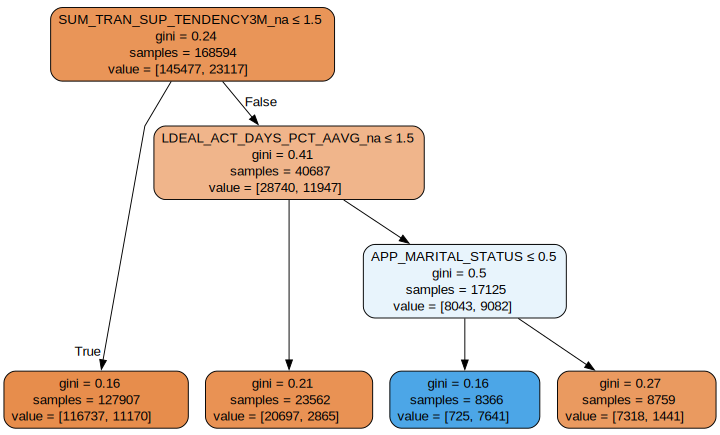

In [97]:
draw_tree(m, to.train.xs, size=10, leaves_parallel=True, precision=2)

The top node represents the initial model before any splits have been done, when all the data is in one group. This is the simplest possible model. It is the result of asking zero questions and will always predict the value to be the average value of the whole dataset.

In this case, we can see it predicts a values of [261123, 23029] for the logarithm of the sales price. It gives a mean squared error of 0.48. The square root of this is 0.69. (Remember that unless you see m_rmse, or a root mean squared error, then the value you are looking at is before taking the square root, so it is just the average of the square of the differences.) We can also see that there are 404,710 auction records in this group—that is the total size of our training set. The final piece of information shown here is the decision criterion for the best split that was found, which is to split based on the coupler_system column.

In [98]:
m_accuracy(m, to.train.xs, to.train.ys)

(0.9039052398068733, 0.9036490462180886)

In [99]:
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

# Define parameter grids using list comprehensions and numpy functions
n_estimators = [100, 200, 250]
max_features = ['log', 'sqrt']
max_depth = [8, 16, 24]
min_samples_split = [5, 10]

parameter_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
}

grid_search = GridSearchCV(rf_model, parameter_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search.fit(to.train.xs, to.train.ys.iloc[:, 0])

best_rf_model = grid_search.best_estimator_

# Evaluate
rf_predictions = best_rf_model.predict(to.valid.xs)
rf_accuracy = accuracy_score(to.valid.ys.iloc[:, 0], rf_predictions)
rf_auc = roc_auc_score(to.valid.ys.iloc[:, 0], rf_predictions)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [100]:
best_rf_model = grid_search.best_estimator_

# Evaluate
rf_predictions = best_rf_model.predict(to.valid.xs)
rf_accuracy = accuracy_score(to.valid.ys.iloc[:, 0], rf_predictions)
rf_auc = roc_auc_score(to.valid.ys.iloc[:, 0], rf_predictions)
rf_accuracy, rf_auc

(0.9264971054379805, 0.7362643957208549)

In [101]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=24, min_samples_split=5, n_estimators=250,
                       n_jobs=-1, random_state=42)

In [102]:
update_summary_table(
    approach='Random Forest',
    lib='sklearn',
    accuracy=rf_accuracy,
    auc=rf_auc
)

,Approach,Library Used,Algorithm,Hyperparameters,Accuracy,AUC Score
0,Baseline (Naive Classifier),sklearn,Naive Classifier,N/A,0.919269,0.5
1,Random Forest,sklearn,Random Forest,Optimized via Grid Search,0.926497,0.736264
2,Scikit-learn (MLPClassifier),Scikit-learn,MLPClassifier,Default / Custom Settings,To be filled,To be filled
3,Keras (TensorFlow),TensorFlow,Keras Neural Network,Custom Settings,To be filled,To be filled
4,TensorFlow,TensorFlow,TensorFlow Neural Network,Custom Settings,To be filled,To be filled
5,NumPy,NumPy,Custom Neural Network,Custom Implementation,To be filled,To be filled


### 3.3 MLP Classifier Implementation

In [103]:
from sklearn.neural_network import MLPClassifier

class MyMLPClassifier:
    def __init__(self, max_iter):
        # 
        self.model = MLPClassifier(**{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (50,50), 'learning_rate': 'adaptive', 'solver': 'adam'},  max_iter=max_iter, random_state=42, verbose=True)

    def train(self, X, y):
        self.model.fit(X, y)

    def evaluate(self, X, y):
        predictions = self.model.predict(X)
        accuracy = accuracy_score(y, predictions)
        auc = roc_auc_score(y, predictions)
        return accuracy, auc

mlp_classifier = MyMLPClassifier(max_iter=50)
mlp_classifier.train(to.train.xs, to.train.ys)
mlp_accuracy, mlp_auc = mlp_classifier.evaluate(to.valid.xs, to.valid.ys)
mlp_accuracy, mlp_auc

Iteration 1, loss = 1.13975807
Iteration 2, loss = 0.69148559
Iteration 3, loss = 0.61404209
Iteration 4, loss = 0.64401277
Iteration 5, loss = 0.47561552
Iteration 6, loss = 0.45525386
Iteration 7, loss = 0.42465255
Iteration 8, loss = 0.39400090
Iteration 9, loss = 0.35837617
Iteration 10, loss = 0.35748877
Iteration 11, loss = 0.34875817
Iteration 12, loss = 0.31303136
Iteration 13, loss = 0.32237696
Iteration 14, loss = 0.31877802
Iteration 15, loss = 0.30269283
Iteration 16, loss = 0.29396660
Iteration 17, loss = 0.29733471
Iteration 18, loss = 0.29255850
Iteration 19, loss = 0.29178947
Iteration 20, loss = 0.27517552
Iteration 21, loss = 0.27318262
Iteration 22, loss = 0.26522058
Iteration 23, loss = 0.26445920
Iteration 24, loss = 0.26058216
Iteration 25, loss = 0.26692661
Iteration 26, loss = 0.25723581
Iteration 27, loss = 0.25823792
Iteration 28, loss = 0.25527099
Iteration 29, loss = 0.25169247
Iteration 30, loss = 0.25121379
Iteration 31, loss = 0.25381255
Iteration 32, los

(0.9209926924171965, 0.7222952684396372)

In [104]:
update_summary_table(
    approach='Scikit-learn (MLPClassifier)',
    lib='sklearn',
    accuracy=mlp_accuracy,
    auc=mlp_auc
)

,Approach,Library Used,Algorithm,Hyperparameters,Accuracy,AUC Score
0,Baseline (Naive Classifier),sklearn,Naive Classifier,N/A,0.919269,0.5
1,Random Forest,sklearn,Random Forest,Optimized via Grid Search,0.926497,0.736264
2,Scikit-learn (MLPClassifier),sklearn,MLPClassifier,Default / Custom Settings,0.920993,0.722295
3,Keras (TensorFlow),TensorFlow,Keras Neural Network,Custom Settings,To be filled,To be filled
4,TensorFlow,TensorFlow,TensorFlow Neural Network,Custom Settings,To be filled,To be filled
5,NumPy,NumPy,Custom Neural Network,Custom Implementation,To be filled,To be filled


###  3.4 Keras

In [106]:
import keras
import keras_tuner
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

keras.utils.set_random_seed(42)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
strategy = tf.distribute.get_strategy() # default strategy that works on CPU and single GPU
print("Number of accelerators: ", strategy.num_replicas_in_sync)

def build_model(hp, opt=None):
    input_features = to.train.xs.shape[1]
    with strategy.scope():
        model = Sequential()


        model.add(Dense(
            units=hp.Int('units_0' , min_value=256, max_value=2048, step=64),
            use_bias=True,
            activation='relu',
            input_shape=(input_features,)))
        model.add(Dropout(hp.Float(f"dropout_rate_0", min_value=0, max_value=0.6, step=0.2)))


        # Dense layers with Batch Normalization and ReLU
        for i in range(1, hp.Int('num_layers', min_value=6, max_value=12)):
            model.add(BatchNormalization())
            model.add(Dense(units=hp.Int('units_' + str(i), min_value=256, max_value=2048, step=512),
                            use_bias=True,
                            kernel_regularizer=l2(0.01)))
            model.add(Activation('relu'))
            model.add(Dropout(hp.Float(f"dropout_rate_{i}", min_value=0, max_value=0.6, step=0.2)))


        # Output layer
        model.add(Dense(1, activation='sigmoid'))

        # Compile the model
        optimizer = opt if opt is not None else Adam(hp.Float('lr', min_value=1e-4, max_value=1e-2, sampling='LOG'))
        model.compile(
            optimizer=optimizer,
            loss='binary_crossentropy',
            metrics=['AUC']
        )
    return model

Num GPUs Available:  1
Number of accelerators:  1


In [107]:
# Hyperparameter tuning setup
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective=keras_tuner.Objective("val_auc", direction="max"),
    max_trials=12,
    executions_per_trial=1,
    overwrite=False,
    directory="/kaggle/working/",
    project_name="hyperparameter_tuning",
    seed=42
)

# Start hyperparameter tuning
tuner.search_space_summary()

early_stopping = keras.callbacks.EarlyStopping(monitor='val_auc', patience=10, min_delta=1e-3, restore_best_weights=True)

# Assuming X_train, y_train, X_test, y_test, and BATCH_SIZE are defined and valid
tuner.search(to.train.xs, to.train.ys, validation_data=(to.valid.xs, to.valid.ys), epochs=70, batch_size=512, callbacks=[early_stopping])

# Display results
tuner.results_summary()

Trial 12 Complete [00h 04m 21s]
val_auc: 0.8720359802246094

Best val_auc So Far: 0.8720359802246094
Total elapsed time: 00h 40m 34s
Results summary
Results in /kaggle/working/hyperparameter_tuning
Showing 10 best trials
Objective(name="val_auc", direction="max")

Trial 11 summary
Hyperparameters:
units_0: 2048
dropout_rate_0: 0.0
num_layers: 7
units_1: 1792
dropout_rate_1: 0.2
units_2: 1792
dropout_rate_2: 0.4
units_3: 768
dropout_rate_3: 0.0
units_4: 256
dropout_rate_4: 0.4
units_5: 1280
dropout_rate_5: 0.0
lr: 0.0014508254070262417
units_6: 768
dropout_rate_6: 0.2
units_7: 1792
dropout_rate_7: 0.4
units_8: 1280
dropout_rate_8: 0.2
units_9: 1792
dropout_rate_9: 0.2
units_10: 256
dropout_rate_10: 0.4
Score: 0.8720359802246094

Trial 00 summary
Hyperparameters:
units_0: 1408
dropout_rate_0: 0.0
num_layers: 8
units_1: 768
dropout_rate_1: 0.4
units_2: 768
dropout_rate_2: 0.2
units_3: 256
dropout_rate_3: 0.2
units_4: 256
dropout_rate_4: 0.4
units_5: 1280
dropout_rate_5: 0.4
lr: 0.00015159

In [108]:
best_hps = tuner.get_best_hyperparameters(1)[0]
best_hps.values

{'units_0': 2048,
 'dropout_rate_0': 0.0,
 'num_layers': 7,
 'units_1': 1792,
 'dropout_rate_1': 0.2,
 'units_2': 1792,
 'dropout_rate_2': 0.4,
 'units_3': 768,
 'dropout_rate_3': 0.0,
 'units_4': 256,
 'dropout_rate_4': 0.4,
 'units_5': 1280,
 'dropout_rate_5': 0.0,
 'lr': 0.0014508254070262417,
 'units_6': 768,
 'dropout_rate_6': 0.2,
 'units_7': 1792,
 'dropout_rate_7': 0.4,
 'units_8': 1280,
 'dropout_rate_8': 0.2,
 'units_9': 1792,
 'dropout_rate_9': 0.2,
 'units_10': 256,
 'dropout_rate_10': 0.4}

In [113]:
best_hps_values = best_hps.values
file_path = 'best_hps_values.pkl'

with open(file_path, 'wb') as f:
    pickle.dump(best_hps_values, f)

print(f'Best hyperparameter values saved in {file_path}') 

Best hyperparameter values saved in best_hps_values.pkl


In [114]:
keras_model = build_model(best_hps)
history = keras_model.fit(to.train.xs, to.train.ys, validation_data=(to.valid.xs, to.valid.ys), epochs=50, batch_size=512)

Epoch 1/50
330/330 [==============================] - 11s 15ms/step - loss: 4.2078 - auc: 0.6368 - val_loss: 0.6858 - val_auc: 0.5153
Epoch 2/50
330/330 [==============================] - 4s 13ms/step - loss: 0.6912 - auc: 0.6657 - val_loss: 0.7099 - val_auc: 0.4343
Epoch 3/50
330/330 [==============================] - 5s 14ms/step - loss: 0.6688 - auc: 0.6722 - val_loss: 1.5799 - val_auc: 0.5986
Epoch 4/50
330/330 [==============================] - 4s 12ms/step - loss: 0.7174 - auc: 0.6781 - val_loss: 0.7522 - val_auc: 0.5755
Epoch 5/50
330/330 [==============================] - 4s 13ms/step - loss: 0.6240 - auc: 0.6787 - val_loss: 0.6331 - val_auc: 0.4650
Epoch 6/50
330/330 [==============================] - 4s 12ms/step - loss: 0.6161 - auc: 0.6805 - val_loss: 0.6983 - val_auc: 0.6711
Epoch 7/50
330/330 [==============================] - 4s 13ms/step - loss: 0.5498 - auc: 0.6819 - val_loss: 0.4884 - val_auc: 0.6442
Epoch 8/50
330/330 [==============================] - 4s 13ms/step -

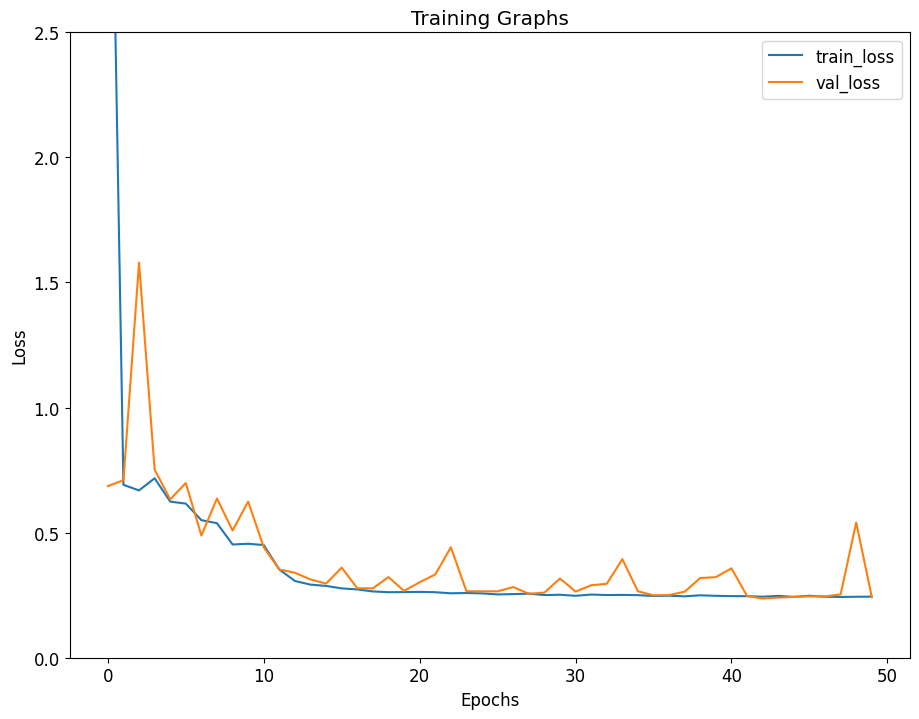

In [115]:
(fig, ax) = plt.subplots(1, 1, figsize=(10, 8))

ax.plot(history.history["loss"], label="train_loss")
ax.plot(history.history["val_loss"], label="val_loss")
ax.set_title("Training Graphs")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_ylim([0, 2.5])
ax.legend()

fig.tight_layout(pad=3.0)
fig.show()

In [116]:
from sklearn.metrics import roc_auc_score, accuracy_score

validation_probs = keras_model.predict(to.valid.xs)
validation_preds = (validation_probs > 0.5).astype(int)

keras_auc = roc_auc_score(to.valid.ys, validation_probs)
keras_acc = accuracy_score(to.valid.ys, validation_preds)

print(f'Keras AUC: {keras_auc}')
print(f'Keras Accuracy: {keras_acc}')

keras_acc, keras_auc


1318/1318 [==============================] - 3s 2ms/step
Keras AUC: 0.8762421592027242
Keras Accuracy: 0.9279681123659486


(0.9279681123659486, 0.8762421592027242)

In [117]:
update_summary_table(
    approach='Keras (TensorFlow)',
    lib='TensorFlow',
    accuracy=keras_acc,
    auc=keras_auc
)

,Approach,Library Used,Algorithm,Hyperparameters,Accuracy,AUC Score
0,Baseline (Naive Classifier),sklearn,Naive Classifier,N/A,0.919269,0.5
1,Random Forest,sklearn,Random Forest,Optimized via Grid Search,0.926497,0.736264
2,Scikit-learn (MLPClassifier),sklearn,MLPClassifier,Default / Custom Settings,0.920993,0.722295
3,Keras (TensorFlow),TensorFlow,Keras Neural Network,Custom Settings,0.927968,0.876242
4,TensorFlow,TensorFlow,TensorFlow Neural Network,Custom Settings,To be filled,To be filled
5,NumPy,NumPy,Custom Neural Network,Custom Implementation,To be filled,To be filled


### 3.5 TensorFlow Approach

In [127]:
xs, ys = tf.convert_to_tensor(to.train.xs, dtype=tf.float32), tf.convert_to_tensor(to.train.ys, dtype=tf.float32)
xs_valid, ys_valid = tf.convert_to_tensor(to.valid.xs, dtype=tf.float32), tf.convert_to_tensor(to.valid.ys, dtype=tf.float32)

xs.shape, ys.shape, xs_valid.shape, ys_valid.shape

(TensorShape([168594, 163]),
 TensorShape([168594, 1]),
 TensorShape([42148, 163]),
 TensorShape([42148, 1]))

In [128]:
BATCH_SIZE = 1024
train_ds = tf.data.Dataset.from_tensor_slices((xs, ys))
train_ds = train_ds.shuffle(buffer_size=xs.shape[0]).batch(BATCH_SIZE)

valid_ds = tf.data.Dataset.from_tensor_slices((xs_valid, ys_valid))
valid_ds = valid_ds.shuffle(buffer_size=xs_valid.shape[0]).batch(BATCH_SIZE)

In [120]:
import tensorflow as tf
from tensorflow.keras import layers, optimizers, losses, metrics

In [124]:
model = tf.keras.Sequential()
for i in range(best_hps_values['num_layers']):
    print(best_hps_values['units_%d' % (i)])
    model.add(BatchNormalization())
    model.add(layers.Dense(best_hps_values['units_%d' % (i)], activation=tf.nn.relu, kernel_regularizer=l2(0.01)))
    model.add(layers.Dropout(best_hps_values['dropout_rate_%d' % (i)]))
model.add(layers.Dense(1, activation=tf.nn.sigmoid))

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=best_hps_values['lr']),
                loss=losses.BinaryCrossentropy(),
                metrics=['accuracy', 'AUC'])

2048
1792
1792
768
256
1280
768


In [125]:
model.build(input_shape=xs.shape)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_25 (Ba  (168594, 163)             652       
 tchNormalization)                                               
                                                                 
 dense_32 (Dense)            (168594, 2048)            335872    
                                                                 
 dropout_28 (Dropout)        (168594, 2048)            0         
                                                                 
 batch_normalization_26 (Ba  (168594, 2048)            8192      
 tchNormalization)                                               
                                                                 
 dense_33 (Dense)            (168594, 1792)            3671808   
                                                                 
 dropout_29 (Dropout)        (168594, 1792)           

In [126]:
_ = model.fit(xs, ys, batch_size=1024, epochs=30, validation_data=(xs_valid, ys_valid))

Epoch 1/30
165/165 [==============================] - 11s 23ms/step - loss: 6.2595 - accuracy: 0.9128 - auc: 0.8064 - val_loss: 0.5916 - val_accuracy: 0.8622 - val_auc: 0.5280
Epoch 2/30
165/165 [==============================] - 3s 19ms/step - loss: 0.6885 - accuracy: 0.9178 - auc: 0.8105 - val_loss: 0.5904 - val_accuracy: 0.8622 - val_auc: 0.7820
Epoch 3/30
165/165 [==============================] - 3s 19ms/step - loss: 0.3953 - accuracy: 0.9220 - auc: 0.8351 - val_loss: 0.5003 - val_accuracy: 0.8646 - val_auc: 0.8325
Epoch 4/30
165/165 [==============================] - 3s 20ms/step - loss: 0.3858 - accuracy: 0.9220 - auc: 0.8347 - val_loss: 0.5753 - val_accuracy: 0.8776 - val_auc: 0.8227
Epoch 5/30
165/165 [==============================] - 3s 19ms/step - loss: 0.4043 - accuracy: 0.9225 - auc: 0.8394 - val_loss: 0.3946 - val_accuracy: 0.9227 - val_auc: 0.8572
Epoch 6/30
165/165 [==============================] - 3s 19ms/step - loss: 0.4164 - accuracy: 0.9222 - auc: 0.8457 - val_los

In [129]:
def loss_fn(y_true, y_pred):  # Use clearer variable names
    loss = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    return tf.reduce_mean(loss)

def one_batch(model, x_batch, y_batch, loss_func, optimizer=None, is_train=False):  # Rename to train_step
    if is_train == True:
        with tf.GradientTape() as tape:
            y_pred = model(x_batch, training=True)
            loss = loss_func(y_batch, y_pred)

        gradients = tape.gradient(loss, model.variables)
        optimizer.apply_gradients(zip(gradients, model.variables))
    else:
        y_pred = model(x_batch, training=False)
        loss = loss_func(y_batch, y_pred)

    return loss

def train_model(model, train_dataset, val_dataset, optimizer, loss_func, epochs=10):  # Use 'val' for validation
    train_losses, val_losses = [], []

    for epoch in range(epochs):
        train_epoch_loss = tf.keras.metrics.Mean()  # Track epoch-wise loss
        val_epoch_loss = tf.keras.metrics.Mean()

        for x_batch, y_batch in train_dataset:
            train_batch_loss = one_batch(model, x_batch, y_batch, loss_func, optimizer=optimizer, is_train=True)
            train_epoch_loss.update_state(train_batch_loss)

        for x_batch, y_batch in val_dataset:
            val_batch_loss = one_batch(model, x_batch, y_batch, loss_func)
            val_epoch_loss.update_state(val_batch_loss)

        print(f"Epoch {epoch + 1}/{epochs} - Training loss: {train_epoch_loss.result():.4f}, Validation loss: {val_epoch_loss.result():.4f}")

        train_losses.append(train_epoch_loss.result())
        val_losses.append(val_epoch_loss.result())
    
    return train_losses, val_losses


In [130]:
train_losses, val_losses = train_model(
    model,
    train_ds,
    valid_ds,
    optimizer=tf.optimizers.Adam(learning_rate=0.001,weight_decay=0.1),
    loss_func=loss_fn
)

Epoch 1/10 - Training loss: 0.2117, Validation loss: 0.2522
Epoch 2/10 - Training loss: 0.2070, Validation loss: 0.2296
Epoch 3/10 - Training loss: 0.2062, Validation loss: 0.2202
Epoch 4/10 - Training loss: 0.2051, Validation loss: 0.2394
Epoch 5/10 - Training loss: 0.2034, Validation loss: 0.2109
Epoch 6/10 - Training loss: 0.2030, Validation loss: 0.2291
Epoch 7/10 - Training loss: 0.2023, Validation loss: 0.2192
Epoch 8/10 - Training loss: 0.2012, Validation loss: 0.2304
Epoch 9/10 - Training loss: 0.2005, Validation loss: 0.2352
Epoch 10/10 - Training loss: 0.2001, Validation loss: 0.2192


In [131]:
validation_probs = model(xs_valid, training=False)
validation_preds = (validation_probs > 0.5).numpy().astype('int')

tensorflow_auc = roc_auc_score(ys_valid, validation_probs)
tensorflow_acc = accuracy_score(ys_valid, validation_preds)

print('Tensorflow AUC:', tensorflow_auc)
print('Tensorflow ACC:', tensorflow_acc)

tensorflow_acc, tensorflow_auc

Tensorflow AUC: 0.8909595261541214
Tensorflow ACC: 0.9285138084843884


(0.9285138084843884, 0.8909595261541214)

In [132]:
update_summary_table(
    approach='TensorFlow',
    lib='TensorFlow',
    accuracy=tensorflow_acc,
    auc=tensorflow_auc
)

,Approach,Library Used,Algorithm,Hyperparameters,Accuracy,AUC Score
0,Baseline (Naive Classifier),sklearn,Naive Classifier,N/A,0.919269,0.5
1,Random Forest,sklearn,Random Forest,Optimized via Grid Search,0.926497,0.736264
2,Scikit-learn (MLPClassifier),sklearn,MLPClassifier,Default / Custom Settings,0.920993,0.722295
3,Keras (TensorFlow),TensorFlow,Keras Neural Network,Custom Settings,0.927968,0.876242
4,TensorFlow,TensorFlow,TensorFlow Neural Network,Custom Settings,0.928514,0.89096
5,NumPy,NumPy,Custom Neural Network,Custom Implementation,To be filled,To be filled


### Most sofisticated Neural network

SuggestedLRs(valley=0.005248074419796467)

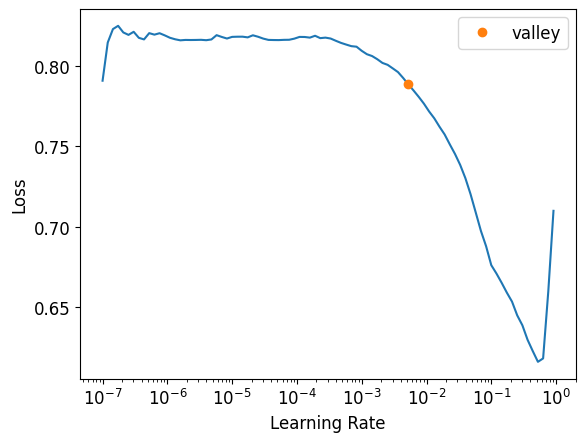

In [133]:
layers = [64, 128, 64]
metrics = [accuracy,RocAucBinary()]
dls = to.dataloaders(shuffle_train=True, device=torch.device('cuda'), bs=512)

# learn = tabular_learner(dls, layers=layers, metrics=metrics, config=tabular_config(ps=0.4))
learn = tabular_learner(dls, layers=layers, metrics=metrics, config=tabular_config(ps=0.4), wd=0.1)
learn.model.to('cuda')

learn.lr_find()

In [134]:
learn.fit(n_epoch=4, lr=0.001)

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,0.253426,0.230105,0.927019,0.867269,00:10
1,0.230069,0.220223,0.929558,0.882525,00:09
2,0.222302,0.217338,0.930056,0.887083,00:09
3,0.214191,0.215536,0.928893,0.892109,00:09


SuggestedLRs(valley=0.0005754399462603033)

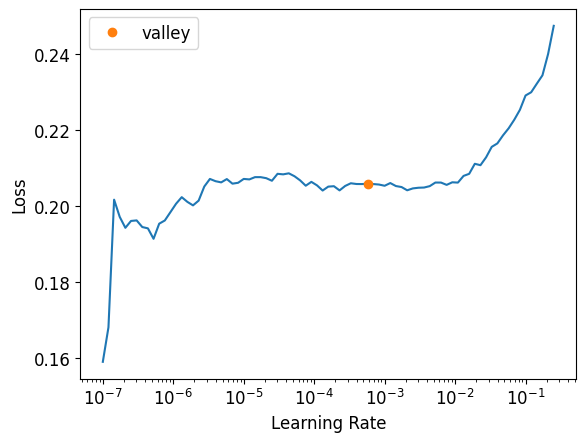

In [135]:
learn.lr_find()

In [136]:
learn.fit_one_cycle(n_epoch=6, lr_max=1e-5)

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,0.211909,0.217609,0.929154,0.888364,00:10
1,0.205525,0.215795,0.929487,0.891393,00:10
2,0.206330,0.217048,0.929629,0.890238,00:10
3,0.209536,0.214258,0.929914,0.893064,00:10
4,0.210443,0.219042,0.929629,0.889948,00:10
5,0.206027,0.215816,0.929676,0.892304,00:10


In [137]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(14, 7)
    (1): Embedding(9, 5)
    (2): Embedding(6, 4)
    (3): Embedding(5, 4)
    (4): Embedding(11701, 304)
    (5): Embedding(3, 3)
    (6): Embedding(13, 7)
    (7-8): 2 x Embedding(3, 3)
    (9-11): 3 x Embedding(5, 4)
    (12): Embedding(12, 6)
    (13-71): 59 x Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(91, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): Linear(in_features=626, out_features=64, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): Dropout(p=0.4, inplace=False)
    )
    (1): LinBnDrop(
      (0): Linear(in_features=64, out_features=128, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): Dropout(p=0.4, inplac